In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns


train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


# Overview
 
## '1'. Data preparation:
##### - Target Distribution¶
#### - Concatenate the table to make cleaning on both train and test data 
## Lets create a list of numerical and categorical features in transaction_data

## '2'. Analyze features

## '3'. Summary of feature analysis

## '4'. Dropping features with many missing values

## '5'. Impute features with low missing values

## '6'. Impute features with medium missing values

## '7'. Final check if there are still missing values in num. columns

## '8'. Dealing with missing values in the cat. features

## '9'. Train the model


## Target Distribution¶


We have 3.87% of Fraud transactions in our dataset. 


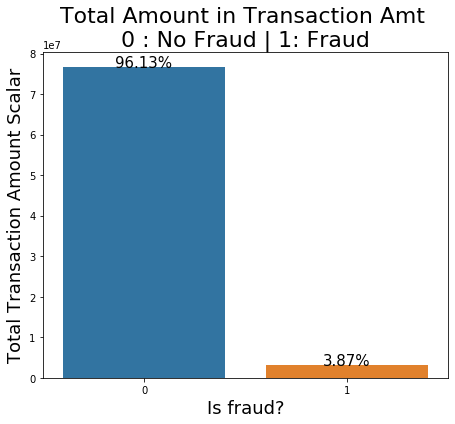

In [4]:
train_transaction['TransactionAmt'] = train_transaction['TransactionAmt'].astype(float)
total = len(train_transaction)
total_amt = train_transaction.groupby(['isFraud'])['TransactionAmt'].sum().sum()
plt.figure(figsize=(16,6))


perc_amt = (train_transaction.groupby(['isFraud'])['TransactionAmt'].sum())
perc_amt = perc_amt.reset_index()
plt.subplot(122)
g1 = sns.barplot(x='isFraud', y='TransactionAmt',  dodge=True, data=perc_amt)
g1.set_title("Total Amount in Transaction Amt \n 0 : No Fraud | 1: Fraud ", fontsize=22)
g1.set_xlabel("Is fraud?", fontsize=18)
g1.set_ylabel('Total Transaction Amount Scalar', fontsize=18)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15) 
    
plt.show()

**After seing that 3.87% in train are fraudulent transactions, we can conclude that this is imbalanced dataset.**

**Next step is to drop the target from our train_transaction dataframe**

## Concatenate the table to make cleaning on both train and test data 

In [5]:
transaction_data = pd.concat([train_transaction, test_transaction])
identity_data = pd.concat([train_identity, test_identity])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Lets create a list of numerical and categorical features in transaction_data

In [6]:
# create a list of numerical features
# create a list of categorical features

c = (identity_data.dtypes == 'object')
n = (identity_data.dtypes != 'object')
cat_id_cols = list(c[c].index)
num_id_cols = list(n[n].index) 

print(cat_id_cols, "\n")
print("number categorical identity features: ", len(cat_id_cols), "\n\n")
print(num_id_cols, "\n")
print("number numerical identity features: ", len(num_id_cols))

['DeviceInfo', 'DeviceType', 'id-12', 'id-15', 'id-16', 'id-23', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'] 

number categorical identity features:  32 


['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-13', 'id-14', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-24', 'id-25', 'id-26', 'id-32', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32'] 

number numerical identity features:  47


## Lets create a list of numerical and categorical features in identity_data

In [7]:
# create a list of numerical features
# create a list of categorical features

c = (transaction_data.dtypes == 'object')
n = (transaction_data.dtypes != 'object')
cat_trans_cols = list(c[c].index)
num_trans_cols = list(n[n].index) 

print(cat_trans_cols, "\n")
print("number categorical transaction features: ", len(cat_trans_cols), "\n\n")
print(num_trans_cols, "\n")

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'ProductCD', 'R_emaildomain', 'card4', 'card6'] 

number categorical transaction features:  14 


['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'TransactionAmt', 'TransactionDT', 'TransactionID', 'V1', 'V10', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V11', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V12', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V13', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V14', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V15', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V16', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', '

**Now we can delete train_transaction, train_identity, test_transaction, test_identity, because we no longer need them.**

In [8]:
# we save the shapes in these variables before deleting the dataframes
shape_of_train_trans = train_transaction.shape
shape_of_train_id    = train_identity.shape

shape_of_test_trans  = test_transaction.shape
shape_of_test_id     = test_identity.shape

del train_transaction
del train_identity
del test_transaction
del test_identity

print("deletion successful!")

deletion successful!


# 2. Analyze features

## 2.1 Analyze identity features

Some id features are categorical features containing strings.

In [9]:
for i in cat_id_cols:
    print(identity_data[i].value_counts())
    print(i, "missing values: ", identity_data[i].isnull().sum())
    print(identity_data[i].isnull().sum()*100/ len(identity_data[i]), "\n")

Windows        92710
iOS Device     38502
MacOS          23722
Trident/7.0    12330
rv:11.0         2650
               ...  
Grand2c            1
A621R              1
A1-850             1
X900+              1
ASUS_Z00XS         1
Name: DeviceInfo, Length: 2799, dtype: int64
DeviceInfo missing values:  52417
18.318655203746417 

desktop    159568
mobile     118173
Name: DeviceType, dtype: int64
DeviceType missing values:  8399
2.9352764381072203 

NotFound    120895
Found        21012
Name: id-12, dtype: int64
id-12 missing values:  144233
50.40644439784721 

Found      67962
New        57785
Unknown    11230
Name: id-15, dtype: int64
id-15 missing values:  149163
52.129377227930384 

Found       66481
NotFound    59266
Name: id-16, dtype: int64
id-16 missing values:  160393
56.05402949605089 

IP_PROXY:TRANSPARENT    3714
IP_PROXY:ANONYMOUS       939
IP_PROXY:HIDDEN          409
Name: id-23, dtype: int64
id-23 missing values:  281078
98.2309359055008 

Found       5059
NotFound       

In [10]:
#  categorical identity features:

#  id_12:   2 values       0  missing values
#  id_15:   3 values    8178  missing values
#  id_16:   2 values   31053  missing values
#  id_23:   3 values  275909  missing values 96%
#  id_27:   2 values  275909  missing values 96%
#  id_28:   2 value     8384  missing values 
#  id_29:   2 values    8384  missing values  
#  id_30:  75 values  137916  missing values 48%
#  id_31: 130 values:   9233  missing values  
#  id_33: 260 values: 142180  missing values 50%
#  id_34:   4 values: 136160  missing values 47%
#  id_35:   2 values:   8178  missing values
#  id_36:   2 values:   8178  missing values
#  id_37:   2 values:   8178  missing values
#  id_38:   2 values:   8178  missing values
#  DeviceType: 2 values 8399  missing values
#  DeviceInfo: 2799 values,  52417  missing values

In [11]:
low_missing_cat_id_cols = []      # lower than 15% missing values
medium_missing_cat_id_cols = []   # between 15% and 60% missing
many_missing_cat_id_cols = []     # more than 60% missing

for i in cat_id_cols:
    percentage = identity_data[i].isnull().sum() * 100 / len(identity_data[i])
    if percentage < 15:
        low_missing_cat_id_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_cat_id_cols.append(i)
    else:
        many_missing_cat_id_cols.append(i)
        
print("cat_id_cols: \n\n")      
print("number low missing(less than 15 %):", len(low_missing_cat_id_cols), "\n")
print("number medium missing (between 15 % and 60 %): ", len(medium_missing_cat_id_cols), "\n")
print("number many missing (more tham 60 %): ", len(many_missing_cat_id_cols), "\n")

cat_id_cols: 


number low missing(less than 15 %): 1 

number medium missing (between 15 % and 60 %):  21 

number many missing (more tham 60 %):  10 



In [12]:
for i in num_id_cols:
    print(identity_data[i].value_counts())
    print(i, "missing values: ", identity_data[i].isnull().sum()) 
    print(identity_data[i].isnull().sum()*100/len(identity_data[i]), "\n") # missing percent

3153916    1
4104577    1
4089388    1
3238264    1
3236217    1
          ..
4003265    1
3241092    1
4107391    1
3056766    1
3147777    1
Name: TransactionID, Length: 286140, dtype: int64
TransactionID missing values:  0
0.0 

-5.0     82579
 0.0     12000
-10.0    11793
-20.0    11130
-15.0     7048
         ...  
-96.0        1
-9.0         1
-52.0        1
-41.0        1
-77.0        1
Name: id-01, Length: 80, dtype: int64
id-01 missing values:  144233
50.40644439784721 

312.0       9
552.0       9
309.0       8
701.0       8
911.0       8
           ..
25864.0     1
1636.0      1
106724.0    1
35819.0     1
94289.0     1
Name: id-02, Length: 114868, dtype: int64
id-02 missing values:  149164
52.12972670720626 

 0.0     63908
 1.0       782
 3.0       774
 2.0       385
 5.0       155
 4.0        84
 6.0        70
-5.0        55
-6.0        53
-2.0        46
-4.0        35
-7.0        33
-8.0        27
-9.0        21
-12.0       16
-11.0       14
-10.0        9
-1.0         6

id_02 missing values:  145268
50.76815544838191 

 0.0     63903
 1.0       863
 3.0       668
 2.0       421
 5.0       109
 4.0       100
 6.0        64
-5.0        33
-6.0        31
-7.0        21
-4.0        21
-10.0       17
-8.0        14
-2.0        12
-1.0        12
-3.0         8
-9.0         6
-11.0        6
 7.0         4
-12.0        3
-13.0        3
 9.0         3
 8.0         1
 10.0        1
Name: id_03, dtype: int64
id_03 missing values:  219816
76.82113650660516 

 0.0     65739
-5.0       132
-6.0        98
-8.0        64
-4.0        51
-1.0        43
-11.0       35
-12.0       34
-10.0       30
-9.0        26
-13.0       24
-7.0        21
-2.0        15
-3.0        10
-28.0        2
Name: id_04, dtype: int64
id_04 missing values:  219816
76.82113650660516 

 0.0     92743
 1.0      8293
 2.0      4937
 3.0      3854
 4.0      2941
         ...  
-34.0        1
 48.0        1
-46.0        1
-38.0        1
-35.0        1
Name: id_05, Length: 93, dtype: int64
id_05 miss

In [13]:
#  numerical identity  features:

#  id_01:       77 values,       0  missing values  
#  id_02:   115655 values,    8292  missing values 
#  id_03:       24 values,  153335  missing values 54%
#  id_04:       15 values,  153335  missing values 54%
#  id_05:       93 values,   14525  missing values 
#  id_06:      101 values,   14525  missing values
#  id_07:       84 values,  275926  missing values 96%
#  id_08:       94 values,  275926  missing values 96%
#  id_09:       46 values,  136876  missing values 48%
#  id_10:       62 values,  136876  missing values 48%
#  id_11:      365 values,    8384  missing values
#  id_13:       54 values,   28534  missing values
#  id_14:       25 values,  134739  missing values 47%
#  id_17:      104 values,   10805  missing values
#  id_18:       18 values,  190152  missing values 66%
#  id_19:      522 values,   10916  missing values
#  id_20:      394 values,   11246  missing values
#  id_21:      490 values,  275922  missing values 96%
#  id_22:       25 values,  275909  missing values 96%
#  id_24:       12 values,  276653  missing values 97%
#  id_25:      341 values,  275969  missing values 96%
#  id_26:       95 values,  275930  missing values 96%
#  id_32:        4 values,  137883  missing values 48%

**So far we have a pretty good overview of our identity features,  but the 378 numerical transaction features are simply too many to evaluate by hand, like we just did with the identity features.**


In [14]:
low_missing_num_id_cols = []      # lower than 15% missing values
medium_missing_num_id_cols = []   # between 15% and 60% missing
many_missing_num_id_cols = []     # more than 60% missing

for i in num_id_cols:
    percentage = identity_data[i].isnull().sum() * 100 / len(identity_data[i])
    if percentage < 15:
        low_missing_num_id_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_num_id_cols.append(i)
    else:
        many_missing_num_id_cols.append(i)
        
print("num_id_cols: \n\n")        
print("number low missing(less than 15 %): ", len(low_missing_num_id_cols), "\n")
print("number medium missing (between 15 % and 60 %): ", len(medium_missing_num_id_cols), "\n")
print("number many missing (more tham 60 %): ", len(many_missing_num_id_cols), "\n")

num_id_cols: 


number low missing(less than 15 %):  1 

number medium missing (between 15 % and 60 %):  18 

number many missing (more tham 60 %):  28 



## 2.2 Analyze transaction features
### 2.2.2 Analyze identity features

In [15]:
for i in cat_trans_cols:
    print(transaction_data[i].value_counts())
    print(i, transaction_data[i].isnull().sum(), "missing values")
    

T    649436
F        56
Name: M1, dtype: int64
M1 447739 missing values
T    588323
F     61169
Name: M2, dtype: int64
M2 447739 missing values
T    518244
F    131248
Name: M3, dtype: int64
M3 447739 missing values
M0    357789
M2    122947
M1     97306
Name: M4, dtype: int64
M4 519189 missing values
F    240155
T    196962
Name: M5, dtype: int64
M5 660114 missing values
F    419433
T    349499
Name: M6, dtype: int64
M6 328299 missing values
F    444604
T     71344
Name: M7, dtype: int64
M7 581283 missing values
F    323650
T    192325
Name: M8, dtype: int64
M8 581256 missing values
T    441935
F     74040
Name: M9, dtype: int64
M9 581256 missing values
gmail.com           435803
yahoo.com           182784
hotmail.com          85649
anonymous.com        71062
aol.com              52337
comcast.net          14474
icloud.com           12316
outlook.com           9934
att.net               7647
msn.com               7480
sbcglobal.net         5767
live.com              5720
verizon.net  

In [16]:

    #  categorical transaction features:

#  ProductCD:      5  values,      0 missing values
#  card4:          4  values,   4663 missing values
#  card6:          4  values,   4578 missing values 
#  P_emaildomain  59  values, 163648 missing values,15%  
#  R_emaildomain  60  values, 824070 missing values 75%  
#  M1:             2  values, 447739 missing values 41%
#  M2:             2  values, 447739 missing values 41% 
#  M3:             2  values, 447739 missing values 41%
#  M4:             3  values, 519189 missing values 47%  
#  M5:             2  values, 660114 missing values 60% 
#  M6:             2  values, 328299 missing values 30% 
#  M7:             2  values, 581283 missing values 53% 
#  M8:             2  values, 581256 missing values 53% 
#  M9:             2  values, 581256 missing values 53% 

For the 378 numerical cols we have to think of something, because we can not evaluate them by hand

In [17]:
low_missing_num_trans_cols = []      # lower than 15% missing values
medium_missing_num_trans_cols = []   # between 15% and 60% missing
many_missing_num_trans_cols = []     # more than 60% missing

for i in num_trans_cols:
    percentage = transaction_data[i].isnull().sum() * 100 / len(transaction_data[i])
    if percentage < 15:
        low_missing_num_trans_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_num_trans_cols.append(i)
    else:
        many_missing_num_trans_cols.append(i)
        
print("num_trans_cols: \n\n")        
print("number low missing (less than 15 %) : ", len(low_missing_num_trans_cols), "\n")
print("number medium missing(between 15 % and 60 %) : ", len(medium_missing_num_trans_cols), "\n")
print("number many missing(more than 60 %): ", len(many_missing_num_trans_cols), "\n")

num_trans_cols: 


number low missing (less than 15 %) :  177 

number medium missing(between 15 % and 60 %) :  36 

number many missing(more than 60 %):  167 



#### We can see there are 155 columns with <15% missing values, we will impute these missing values somehow.
#### For the 56 columns with 15%-60% missing values we will think of something later.
#### For the 167 columns with more than 60% missing values, we will simply drop these columns.

In [18]:
low_missing_cat_trans_cols = []      # lower than 15% missing values
medium_missing_cat_trans_cols = []   # between 15% and 60% missing
many_missing_cat_trans_cols = []     # more than 60% missing

for i in cat_trans_cols:
    percentage = transaction_data[i].isnull().sum() * 100 / len(transaction_data[i])
    if percentage < 15:
        low_missing_cat_trans_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_cat_trans_cols.append(i)
    else:
        many_missing_cat_trans_cols.append(i)
        
print("cat_trans_cols: \n\n")    
print("number low missing: ", len(low_missing_cat_trans_cols), "\n")
print("number medium missing: ", len(medium_missing_cat_trans_cols), "\n")
print("number many missing: ", len(many_missing_cat_trans_cols), "\n")

cat_trans_cols: 


number low missing:  4 

number medium missing:  8 

number many missing:  2 



# 3. SUMMARY OF ANALYSIS 

In [19]:
# Summary so far:

# we have 2 dataframes:   transaction_data and identity_data

####################################################################
# features:

# transaction_data:     14 categorical and 378 numerical features
# identity_data:        17 categorical and  23 numerical features
####################################################################
# missing values:

# cat_trans_cols:      4 low,    8 medium,    2 many 
# num_trans_cols:    176 low,   35 medium,  167 many

# cat_id_cols:        11 low,    4 medium,    2 many 
# num_id_cols:         9 low,    6 medium,    8 many
####################################################################

### We will drop all numerical features with many missing values.
### We will impute with 'median' all numerical features with medium missing values.
### We will impute with 'mean' all numerical features with low missing values.
### But first let's drop all numerical features with many missing values.

# 4. Dropping features with many missing values

In [20]:
print("shape before dropping num_trans_cols: ", transaction_data.shape, "\n")        
transaction_data = transaction_data.drop(columns = many_missing_num_trans_cols)
print("shape after dropping num_trans_cols: ", transaction_data.shape, "\n\n")    


print("shape before dropping num_id_cols: ", identity_data.shape, "\n")        
identity_data = identity_data.drop(columns = many_missing_num_id_cols)
print("shape after dropping num_id_cols: ", identity_data.shape, "\n")


# because we dropped some numerical columns from the dataframe,
# we must create the list 'num_trans_cols' and
# 'num_id_cols' again such that the dropped cols are no longer in them
n = (transaction_data.dtypes != 'object')
num_trans_cols = list(n[n].index) 

n = (identity_data.dtypes != 'object')
num_id_cols = list(n[n].index) 

shape before dropping num_trans_cols:  (1097231, 394) 

shape after dropping num_trans_cols:  (1097231, 227) 


shape before dropping num_id_cols:  (286140, 79) 

shape after dropping num_id_cols:  (286140, 51) 



# 5. Impute features with low missing values

## 5.1 Impute the transaction features

In [21]:
from sklearn.impute import SimpleImputer

print("index before imputation: ", transaction_data.index, "\n")
print("columns before imputation: ", transaction_data.columns, "\n")

my_imputer = SimpleImputer(strategy = 'mean') 
my_imputer.fit(transaction_data[low_missing_num_trans_cols])

#print("values before imputing: ", train_transaction[low_missing_num_trans_cols], "\n")

transaction_data[low_missing_num_trans_cols] = my_imputer.transform(transaction_data[low_missing_num_trans_cols])

print("index after imputation: ", transaction_data.index, "\n")
print("columns after imputation: ", transaction_data.columns, "\n")

index before imputation:  Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            506681, 506682, 506683, 506684, 506685, 506686, 506687, 506688,
            506689, 506690],
           dtype='int64', length=1097231) 

columns before imputation:  Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5',
       ...
       'addr1', 'addr2', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'dist1', 'isFraud'],
      dtype='object', length=227) 

index after imputation:  Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            506681, 506682, 506683, 506684, 506685, 506686, 506687, 506688,
            506689, 506690],
           dtype='int64', length=1097231) 

columns after imputation:  Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5',
       ...
       'addr1', 'addr2', 'card1', 'card2', 'car

## 5.2 Impute the identity features

In [22]:
print("index before imputation: ", identity_data.index, "\n")
print("columns before imputation: ", identity_data.columns, "\n")


my_imputer = SimpleImputer(strategy = 'mean') 
my_imputer.fit(identity_data[low_missing_num_id_cols])
identity_data[low_missing_num_id_cols] = my_imputer.transform(identity_data[low_missing_num_id_cols])

print("index after imputation: ", identity_data.index, "\n")
print("columns after imputation: ", identity_data.columns, "\n")

index before imputation:  Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            141897, 141898, 141899, 141900, 141901, 141902, 141903, 141904,
            141905, 141906],
           dtype='int64', length=286140) 

columns before imputation:  Index(['DeviceInfo', 'DeviceType', 'TransactionID', 'id-01', 'id-02', 'id-05',
       'id-06', 'id-11', 'id-12', 'id-13', 'id-15', 'id-16', 'id-17', 'id-19',
       'id-20', 'id-23', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-33',
       'id-34', 'id-35', 'id-36', 'id-37', 'id-38', 'id_01', 'id_02', 'id_05',
       'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19',
       'id_20', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38'],
      dtype='object') 

index after imputation:  Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9

# 6. Impute features with medium missing values

## 6.1 Impute the transaction features

In [23]:
print("index before imputation: ", transaction_data.index, "\n")
print("columns before imputation: ", transaction_data.columns, "\n")

print("values before imputing: ", transaction_data[medium_missing_num_trans_cols], "\n")

my_imputer = SimpleImputer(strategy = 'median') 
my_imputer.fit(transaction_data[medium_missing_num_trans_cols])

transaction_data[medium_missing_num_trans_cols] = my_imputer.transform(transaction_data[medium_missing_num_trans_cols])

print("index after imputation: ", transaction_data.index, "\n")
print("columns after imputation: ", transaction_data.columns, "\n")

index before imputation:  Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            506681, 506682, 506683, 506684, 506685, 506686, 506687, 506688,
            506689, 506690],
           dtype='int64', length=1097231) 

columns before imputation:  Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5',
       ...
       'addr1', 'addr2', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'dist1', 'isFraud'],
      dtype='object', length=227) 

values before imputing:            D11     D2    D3    D4    D5   V1  V10  V11   V2   V3  ...   V5  \
0        13.0    NaN  13.0   NaN   NaN  1.0  0.0  0.0  1.0  1.0  ...  1.0   
1         NaN    NaN   NaN   0.0   NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2       315.0    NaN   NaN   0.0   NaN  1.0  0.0  0.0  1.0  1.0  ...  1.0   
3         NaN  112.0   0.0  94.0   0.0  NaN  NaN  NaN  NaN  NaN  ...  NaN   
4         NaN    NaN   NaN   NaN   NaN  N

## 6.2 Impute the identity features¶

In [24]:
print("index before imputation: ", identity_data.index, "\n")
print("columns before imputation: ", identity_data.columns, "\n")


my_imputer = SimpleImputer(strategy = 'median') 
my_imputer.fit(identity_data[medium_missing_num_id_cols])

print("values before imputing: ", identity_data[medium_missing_num_id_cols], "\n")

identity_data[medium_missing_num_id_cols] = my_imputer.transform(identity_data[medium_missing_num_id_cols])

print("index after imputation: ", identity_data.index, "\n")
print("columns after imputation: ", identity_data.columns, "\n")

index before imputation:  Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            141897, 141898, 141899, 141900, 141901, 141902, 141903, 141904,
            141905, 141906],
           dtype='int64', length=286140) 

columns before imputation:  Index(['DeviceInfo', 'DeviceType', 'TransactionID', 'id-01', 'id-02', 'id-05',
       'id-06', 'id-11', 'id-12', 'id-13', 'id-15', 'id-16', 'id-17', 'id-19',
       'id-20', 'id-23', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-33',
       'id-34', 'id-35', 'id-36', 'id-37', 'id-38', 'id_01', 'id_02', 'id_05',
       'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19',
       'id_20', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38'],
      dtype='object') 

values before imputing:          id-01     id-02  id-05  id-06  id-11  id-13  id-17  id-19  id-20  \
0         NaN       NaN   

# 7. Dealing with missing values in the categorical features

**-Drop features with many missing values**


## 7.1 Drop categorical features with many missing values

In [25]:
print("shape before dropping many_missing_cat_trans_cols: ", transaction_data.shape, "\n")        
transaction_data = transaction_data.drop(columns = many_missing_cat_trans_cols)
print("shape after dropping many_missing_cat_trans_cols: ", transaction_data.shape, "\n\n")    

print("shape before dropping many_missing_cat_id_cols: ", identity_data.shape, "\n")        
identity_data = identity_data.drop(columns = many_missing_cat_id_cols)
print("shape after dropping many_missing_cat_id_cols: ", identity_data.shape, "\n")


# because we dropped some categorical columns from the dataframe,
# we must create the list 'cat_trans_cols' and
# 'cat_id_cols' again such that the dropped cols are no longer in them
c = (transaction_data.dtypes == 'object')
cat_trans_cols = list(c[c].index) 

c = (identity_data.dtypes == 'object')
cat_id_cols = list(c[c].index) 

shape before dropping many_missing_cat_trans_cols:  (1097231, 227) 

shape after dropping many_missing_cat_trans_cols:  (1097231, 225) 


shape before dropping many_missing_cat_id_cols:  (286140, 51) 

shape after dropping many_missing_cat_id_cols:  (286140, 41) 



In [37]:
transaction_data.to_csv("transaction_data.csv", index = False)
identity_data.to_csv("identity_data.csv", index = False)